# Julia Express - An Introduction to Julia
Julia is a programming language for scientific computing. This is sample $\LaTeX$ equation
$$I = \int_0^1 f(x) dx$$

In [1]:
versioninfo()

Julia Version 0.3.5
Commit a05f87b* (2015-01-08 22:33 UTC)
Platform Info:
  System: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i5-3230M CPU @ 2.60GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Sandybridge)
  LAPACK: libopenblas
  LIBM: libopenlibm
  LLVM: libLLVM-3.3


## Basic literals and types

In [9]:
println(typeof(1))
println(typeof(1.0))
println(convert(Int64, 1.0))
println(typeof('z'))
println(typeof("abc"))
println(typeof(2<3))

Int64
Float64
1
Char
ASCIIString
Bool


In [11]:
println(isa(1, Int64))
println(isa(1, Int32))
println(isa(1.0, Float64))

true
false
true


## Complex literals and types
### Tuples

In [20]:
a = ()
println(a)
b = (1,)
println(b)
c = ("a", 1)
println(c)
d = ('a', false)::(Char, Bool)
println(d)
x = (1, 2, 3)
println(x[1])
println(x[1:2])
a, b = x
println(x, a, b)
x[1]=10 # Error

()
(1,)
("a",1)
('a',false)
1
(1,2)
(1,2,3)12


LoadError: `setindex!` has no method matching setindex!(::(Int64,Int64,Int64), ::Int64, ::Int64)
while loading In[20], in expression starting on line 14

## Arrays

Arrays are a collection of elements, all of which are of the same type. An array has dimensions - vector is one dimensioned, matrix is two dimensioned. An array has a size along each dimension. Following functions help us inquire and determine its various attributes:

eltype()
ndims()
size()
length()

In [23]:
a = [1, 2, 3, 4, 5]
println("\nArray a")
println("Type = ", typeof(a))
println("Elements are of type ", eltype(a))
println("Dimensions = ", ndims(a))
println("Size (Tuple of size along each dimension) = ", size(a))
println("Size of first dimension =", size(a, 1))
println("Length (number of elements) = ", length(a))


Array a
Type = Array{Int64,1}
Elements are of type Int64
Dimensions = 1
Size (Tuple of size along each dimension) = (5,)
Size of first dimension =5
Length (number of elements) = 5


In [25]:
b = [1 2 3 4 5] # Without commas separating the elements, treated as two dimensioned
println("\nArray b")
println("Type = ", typeof(b))
println("Dimensions = ", ndims(b))
println("Size (Tuple of size along each dimension) = ", size(b))
println(size(b, 1), ", ", size(b, 2))
println("Length (number of elements) = ", length(b))


Array b
Type = Array{Int64,2}
Dimensions = 2
Size (Tuple of size along each dimension) = (1,5)
1, 5
Length (number of elements) = 5


In [26]:
println("\nArray c")
c = [1 2 3 4 5; 6 7 8 9 10; 11 12 13 14 15]
println("Type = ", typeof(c))
println("Dimensions = ", ndims(c))
println("Size (Tuple of size along each dimension) = ", size(c))
println(size(c, 1), ", ", size(c, 2))
println("Length (number of elements) = ", length(c))


Array c
Type = Array{Int64,2}
Dimensions = 2
Size (Tuple of size along each dimension) = (3,5)
3, 5
Length (number of elements) = 15


## Array Indexes

In [27]:
println(a)
for i = 1:size(a, 1)
    println(i, " ", a[i])
end
println(a[1:3])
println(a[1:end])
println(a[4:end])
println(a[1:2:end])
println(a[5:-1:1])

[1,2,3,4,5]
1 1
2 2
3 3
4 4
5 5
[1,2,3]
[1,2,3,4,5]
[4,5]
[1,3,5]
[5,4,3,2,1]


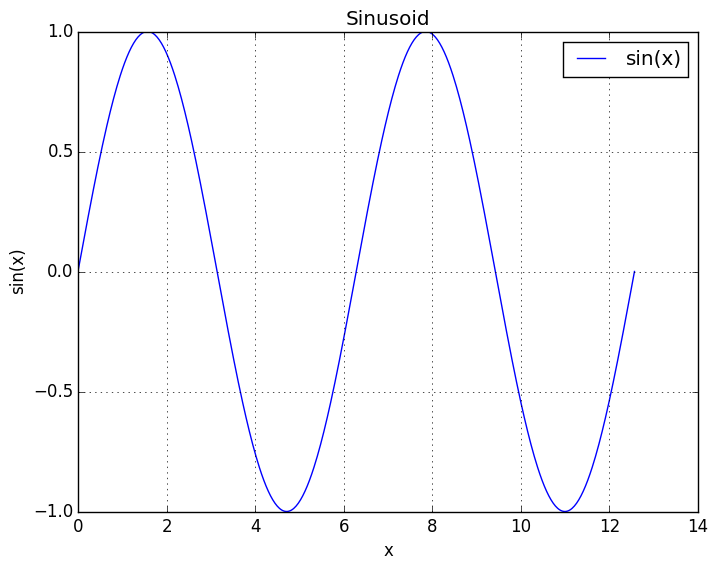

PyObject <matplotlib.legend.Legend object at 0x000000002AE607B8>

In [32]:
using PyPlot

x = linspace(0, 4*pi, 501);
y = sin(x);
plot(x, y)
grid()
xlabel("x")
ylabel("sin(x)")
title("Sinusoid")
legend(["sin(x)"])

# Numerical Solution of First Order ODEs

First order ODEs are of the form:
$ y'(x) = f(x, y), \qquad y(x_0) = y_0 $


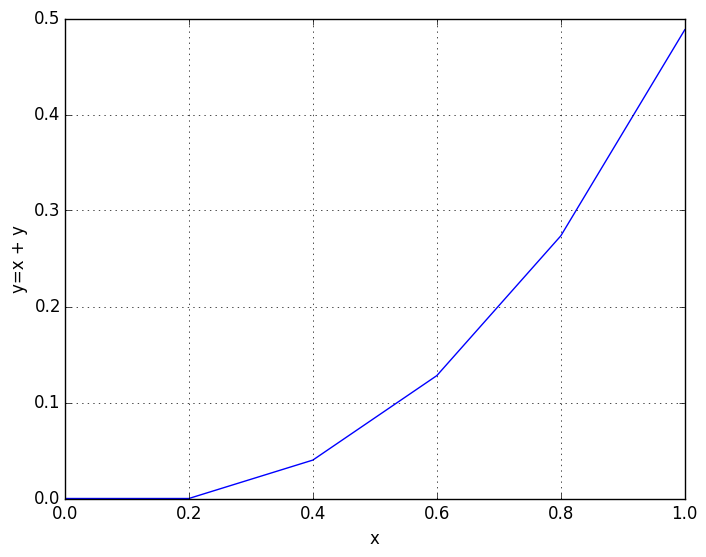

PyObject <matplotlib.text.Text object at 0x000000002B5F9CC0>

In [36]:
function f(x, y)
    return x + y
end

function euler(f, x0, y0, xn, h, n)
    x = linspace(x0, xn, n+1)
    y = zeros(n+1)
    y[1] = y0

    for i = 2:n+1
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])
    end
    return (x, y)
end

x, y = euler(f, 0, 0, 1, 0.2, 5)
plot(x, y)
grid()
xlabel("x")
ylabel("y=x + y")

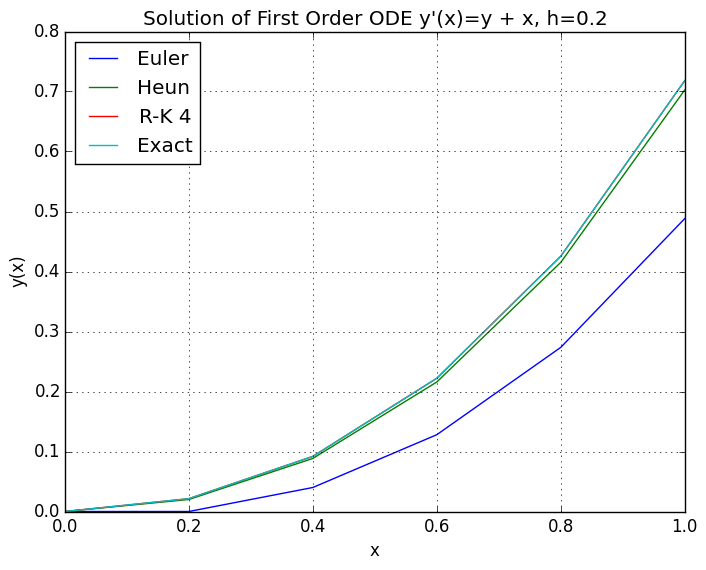

PyObject <matplotlib.text.Text object at 0x00000000220E9CF8>

In [37]:
function heun(f, x0, y0, xn, h, n)
    x = linspace(x0, xn, n+1)
    y = zeros(n+1)
    y[1] = y0
    for i = 2:n+1
        k1 = h * f(x[i-1], y[i-1])
        k2 = h * f(x[i], y[i-1] + k1)
        y[i] = y[i-1] + (k1 + k2) / 2
    end
    return (x, y)
end

function rk4(f, x0, y0, xn, h, n)
    x = linspace(x0, xn, n+1)
    y = zeros(n+1)
    y[1] = y0
    for i = 2:n+1
        k1 = h * f(x[i-1], y[i-1])
        k2 = h * f(x[i-1]+h/2, y[i-1]+k1/2)
        k3 = h * f(x[i-1]+h/2, y[i-1]+k2/2)
        k4 = h * f(x[i], y[i-1]+k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    end
    return (x, y)
end

x1, y1 = heun(f, 0, 0, 1, 0.2, 5)
x2, y2 = rk4(f, 0, 0, 1, 0.2, 5)
plot(x, y, x1, y1, x2, y2, x, exp(x) - x - 1)
grid()
xlabel("x")
ylabel("y(x)")
legend(["Euler", "Heun", "R-K 4", "Exact"], loc=2)
title("Solution of First Order ODE y'(x)=y + x, h=0.2")

# Gauss Elimination

In [38]:
function getabsmaxrow(a, p)
    n, m = size(a)
    r = p
    m = maxabs(a[p,p])
    for i = p:n
        if maxabs(a[i,p]) > m
            r = i
            m = maxabs(a[i,p])
        end
    end
    return r
end

function forward_elim(a, b)
    n, m = size(a)
    n1 = size(b)
    for p=1:n-1
        r = getabsmaxrow(a, p)
        println(p, " => ", r)
        if p != r
            tmp = copy(a[p,:])
            a[p,:] = copy(a[r,:])
            a[r,:] = copy(tmp)
        end
        for i = p+1:n
            k = a[i,p] / a[p,p]
            a[i,p:n] = a[i,p:n] - k * a[p, p:n]
            b[i] = b[i] - k * b[p]
        end
    end
    return (a, b)
end

function backsub(a, b)
    n = size(b)[1]
    x = zeros(n)
    x[n] = b[n] / a[n,n]

    for i = n-1:-1:1
        s = sum(a[i, i+1:n]*x[i+1:n])
        x[i] = (b[i] - s)/a[i,i]
    end
    return x
end

a = [-3.0 6.0 -9.0; 1.0 -4.0 3.0; 2.0 5.0 -7.0]
b = [-46.725, 19.571, -20.073]
println(a, b)
x = inv(a) * b
println(x)

a, b = forward_elim(a, b)
println(a, b)
x = backsub(a, b)
println(x)

[-3.0 6.0 -9.0
 1.0 -4.0 3.0
 2.0 5.0 -7.0][-46.725,19.571,-20.073]
[3.9080000000000004,-1.998000000000001,2.5569999999999995]
1 => 1
2 => 3
[-3.0 6.0 -9.0
 0.0 9.0 -13.0
 0.0 0.0 -2.888888888888889][-46.725,3.996000000000002,-50.335]
[14.52703846153846,25.611500000000003,17.423653846153847]
